In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from Inleveropgave2.main import reformatMatrix, printTriangleMatrix

from Inleveropgave2.doolhof.maze import Maze
from Inleveropgave2.doolhof.agent import Agent
from Inleveropgave2.doolhof.policy import Policy

In [3]:
startPos = (2, 0)

doolhof = Maze()
policy = Policy(doolhof)

startStateIndex = doolhof.coordsToIndex(startPos)
startState = doolhof.map[startStateIndex[0]][startStateIndex[1]]

agent = Agent(doolhof, policy, startState)

# Model-Free Prediction

## First-visist MC prediction

### Optimal policy

In [4]:
agent.policy.matrix = [
    [[0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1]],
    [[0, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 1]]]

values = agent.monteCarloPolicyEvaluation(10000, discount=1)
for row in values:
    print(row)

[38.0, 39.0, 40.0, 0]
[37.0, 38.0, 39.0, 40.0]
[36.0, 37.0, 36.0, 35.0]
[0, 36.0, 35.0, 34.0]


In [5]:
agent.policy.matrix = [
    [[0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1]],
    [[0, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 1]]]

values = agent.monteCarloPolicyEvaluation(10000, discount=0.9)
for row in values:
    print(row)

[30.5, 35.0, 40.0, 0]
[26.450000000000447, 30.5, 35.0, 40.0]
[22.805000000000184, 26.449999999998166, 22.805000000000266, 19.524499999999847]
[0, 22.805000000000177, 19.524499999999836, 16.572050000000054]


### Random policy

In [6]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.monteCarloPolicyEvaluation(100000, discount=1)
for row in values:
    print(row)

[-14.146028233242799, -10.710306857744312, 1.5409767997093475, 0]
[-13.497507880486031, -15.667792253060869, -12.735598540765249, -4.161978787563689]
[-6.695725388601036, -13.57872511137856, -18.759839602493134, -18.35572259941804]
[0, -8.140753077103229, -17.241987396208042, -19.891738082485272]


In [7]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.monteCarloPolicyEvaluation(100000, discount=0.9)
for row in values:
    print(row)

[-5.196046928887003, -3.0245378594453705, 6.813627799154362, 0]
[-5.164152977974017, -7.486227951282878, -4.96829065703556, 2.3305754640366394]
[-0.8036838958786092, -5.663971043609677, -9.181978488173723, -8.601888570324464]
[0, -1.8567655155248721, -7.255330257707789, -8.353306856507494]


## Tabular

### Optimal policy

In [8]:
agent.policy.matrix = [
    [[0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1]],
    [[0, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 1]]]

values = agent.tabular(10000, discount=1)
for row in values:
    print(row)

[37.999999999999915, 38.99999999999994, 39.99999999999997, 0]
[36.999999999999886, 37.999999999999915, 38.99999999999994, 39.99999999999997]
[35.99999999999986, 36.999999999999886, 35.99999999999986, 34.99999999999983]
[0, 35.99999999999986, 34.99999999999983, 33.9999999999998]


In [9]:
agent.policy.matrix = [
    [[0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1]],
    [[0, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 1]]]

values = agent.tabular(10000, discount=0.9)
for row in values:
    print(row)

[30.50000000000003, 35.000000000000014, 39.99999999999997, 0]
[26.450000000000045, 30.50000000000003, 35.000000000000014, 39.99999999999997]
[22.805000000000057, 26.450000000000045, 22.805000000000057, 19.524500000000067]
[0, 22.805000000000057, 19.524500000000067, 16.572050000000075]


### Random policy

In [10]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.tabular(100000, discount=1)
for row in values:
    print(row)

[-13.950078925786718, -12.653499089923784, -9.391545606794404, 0]
[-16.06547435902743, -17.11175179868863, -18.40563912199523, -12.78365951450525]
[-10.098940809903691, -17.14253312967106, -20.974388486320972, -21.674601634583983]
[0, -9.511642516108704, -18.422651572090363, -20.561267613140938]


In [11]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.tabular(100000, discount=0.9)
for row in values:
    print(row)

[-6.176228142051054, -2.8518993249258497, 7.792228494192317, 0]
[-5.5271461961786255, -6.57692571330717, -2.6792624321811327, 12.574378981017436]
[-0.656562069753474, -6.0711124498536195, -7.869397657211518, -7.693046649049823]
[0, -1.686695640361039, -6.670256627757951, -7.279385288461573]


# Model-Free Control

## On-policy first-visit Monte-Carlo Control

### Discount = 1

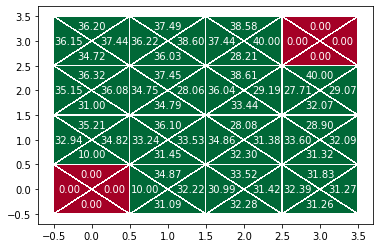

In [12]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.onPolicyFirstVisitMonteCarloControl(episodes=200000, discount=1)
matrix = reformatMatrix(values)
printTriangleMatrix(matrix)

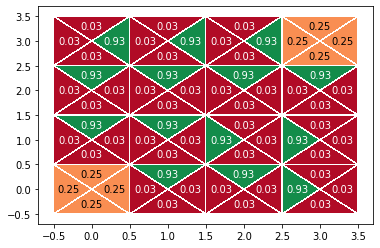

In [13]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)

### Discount = 0.9

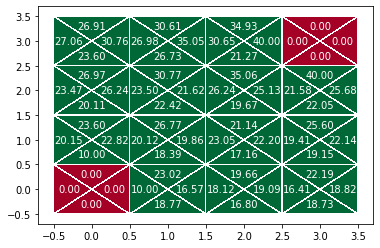

In [30]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.onPolicyFirstVisitMonteCarloControl(episodes=200000, discount=0.9) #discount = 0.92
matrix = reformatMatrix(values)
printTriangleMatrix(matrix)

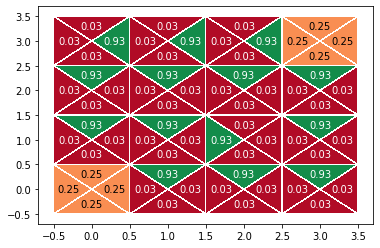

In [31]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)

## Sarsa

### Discount = 1

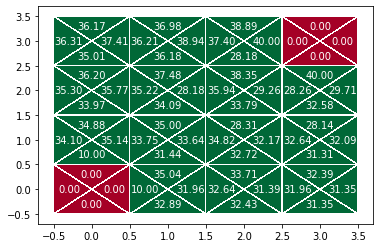

In [16]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.sarsa(episodes=100000, discount=1)
matrix = reformatMatrix(values)
printTriangleMatrix(matrix)

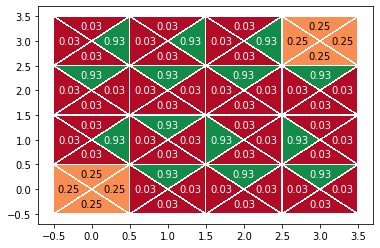

In [17]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)

### Discount = 0.9

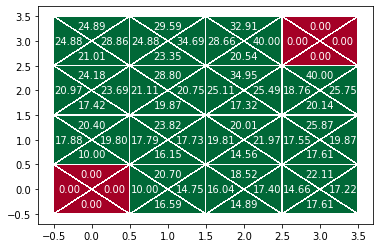

In [18]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.sarsa(episodes=100000, discount=0.9)
matrix = reformatMatrix(values)
printTriangleMatrix(matrix)

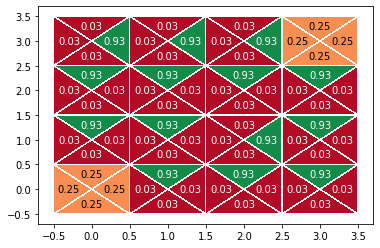

In [19]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)

## Q-learning

### Discount = 1

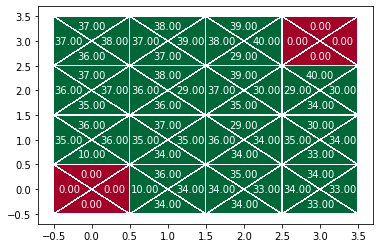

In [20]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.qLearning(episodes=100000, discount=1)
matrix = reformatMatrix(values)
printTriangleMatrix(matrix)

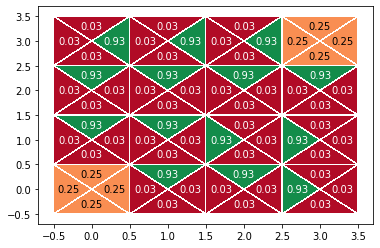

In [21]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)

### Discount = 0.9

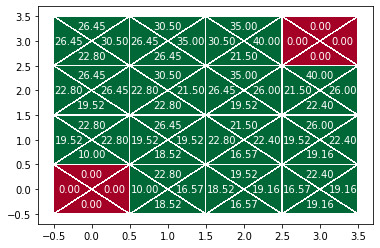

In [22]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.qLearning(episodes=100000, discount=0.9)
matrix = reformatMatrix(values)
printTriangleMatrix(matrix)

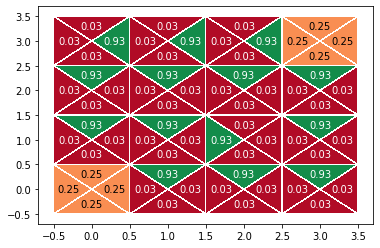

In [23]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)

## Double Q-learning

### Discount = 1

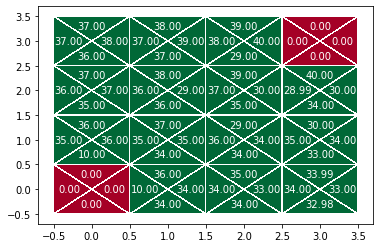

In [24]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

Q1, Q2 = agent.doubleqLearning(episodes=100000, discount=1)
matrix = reformatMatrix(Q1)
printTriangleMatrix(matrix)

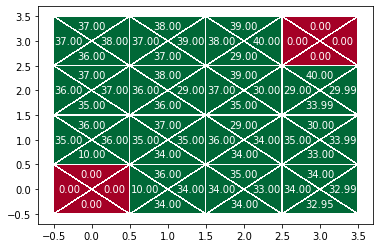

In [25]:
matrix = reformatMatrix(Q2)
printTriangleMatrix(matrix)

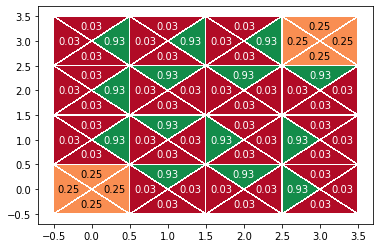

In [26]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)

### Discount = 0.9

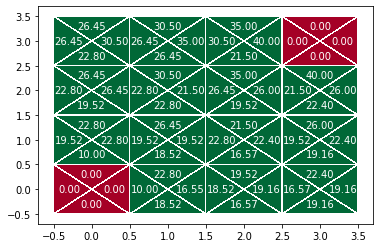

In [27]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

Q1, Q2 = agent.doubleqLearning(episodes=100000, discount=0.9)
matrix = reformatMatrix(Q1)
printTriangleMatrix(matrix)

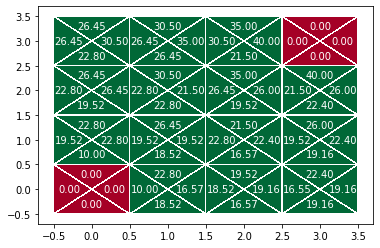

In [28]:
matrix = reformatMatrix(Q2)
printTriangleMatrix(matrix)

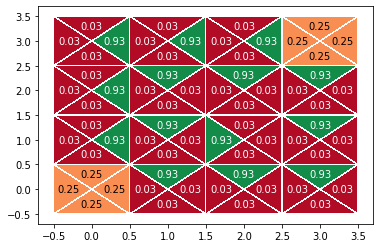

In [29]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)